## Importing all the important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading and checking our data

In [3]:
us_housing = pd.read_csv('USA_Housing.csv')

In [4]:
us_housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
us_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
us_housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Finding the correlation between the features

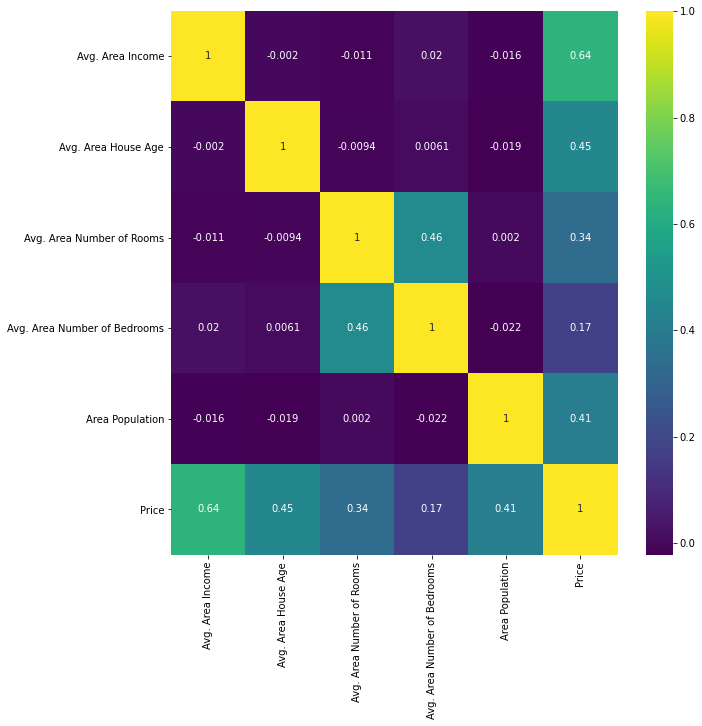

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(us_housing.corr(), cmap='viridis', annot=True)

## We will now categorize data into X, and y:
    X will denote the features that will be required to predict the price.
    y will denote the "Price" feature, which we will predict, using our model

In [30]:
X = us_housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = us_housing['Price']

## Train-Test Split
### This is a function which will split our whole dataset into "train" and "test" datasets

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating the model using Linear Regression

In [33]:
#Importing Linear Regression from linear_model library
from sklearn.linear_model import LinearRegression 

In [34]:
#Initialize the model
lm = LinearRegression()

In [36]:
#Fitting our train data on the model
lm.fit(X_train, y_train)

LinearRegression()

## Evaluating our Model

In [37]:
print(lm.intercept_)

-2640159.796851911


In [43]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [42]:
coefficient_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

coefficient_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## What do this coefficients mean?

1. With 1 unit increase in the Average Area Income and keeping the other features fixed, the price increases by $21.52

2. With 1 unit increase in the Average Area House Age and keeping the other features fixed, the price increases by $164883.28

3. With 1 unit increase in the Average Area Number of Rooms and keeping the other features fixed, the price increases by $122368.67

4. With 1 unit increase in the Average Area Number of Bedrooms and keeping the other features fixed, the price increases by $2233.80

5. With 1 unit increase in the Area Population and keeping the other features fixed, the price increases by $15.15

## Now we move on the the Prediction Analysis!

In [59]:
predictions = lm.predict(X_test)

In [60]:
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

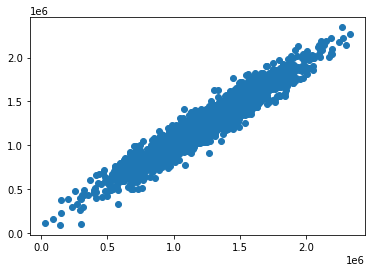

In [62]:
plt.scatter(y_test, predictions)

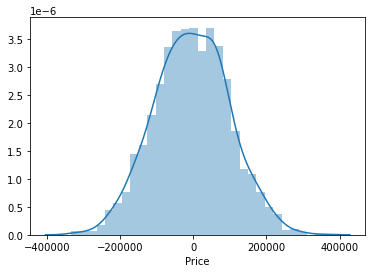

In [68]:
#Using a residual histogram
sns.distplot(y_test-predictions, bins=30)

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [69]:
from sklearn import metrics

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914954
MSE: 10460958907.209501
RMSE: 102278.82922291153
